In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

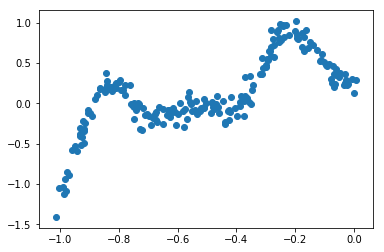

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

optimizer = tnn.Adam()
linear1 = tnn.LinearLayer(1, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.6147423100095263
Weight 1 
 [[-1.64588702]]
Biases 1 
 [-0.01]


_______________________
epoch 10
Loss 0.49775712862019567
Weight 1 
 [[-1.54656895]]
Biases 1 
 [-0.10891719]


_______________________
epoch 20
Loss 0.40706054653949847
Weight 1 
 [[-1.4504817]]
Biases 1 
 [-0.20244498]


_______________________
epoch 30
Loss 0.342219834555223
Weight 1 
 [[-1.36023681]]
Biases 1 
 [-0.28551747]


_______________________
epoch 40
Loss 0.2994837309186177
Weight 1 
 [[-1.2777055]]
Biases 1 
 [-0.35365229]


_______________________
epoch 50
Loss 0.27304884648181926
Weight 1 
 [[-1.20372386]]
Biases 1 
 [-0.40383717]


_______________________
epoch 60
Loss 0.2568438247296097
Weight 1 
 [[-1.13806873]]
Biases 1 
 [-0.43513182]


_______________________
epoch 70
Loss 0.24597719768552984
Weight 1 
 [[-1.07964431]]
Biases 1 
 [-0.448772]


_______________________
epoch 80
Loss 0.23733517653513098
Weight 1 
 [[-1.02681112]]
Biases 1 
 [-0.44767967]


________

Weight 1 
 [[0.96653262]]
Biases 1 
 [0.60112614]


_______________________
epoch 760
Loss 0.04705125524011915
Weight 1 
 [[0.97333087]]
Biases 1 
 [0.60473571]


_______________________
epoch 770
Loss 0.046998011972397655
Weight 1 
 [[0.9797495]]
Biases 1 
 [0.60814372]


_______________________
epoch 780
Loss 0.046951083078336335
Weight 1 
 [[0.98580515]]
Biases 1 
 [0.61135898]


_______________________
epoch 790
Loss 0.046909778936584295
Weight 1 
 [[0.99151404]]
Biases 1 
 [0.61439012]


_______________________
epoch 800
Loss 0.0468734774992744
Weight 1 
 [[0.99689197]]
Biases 1 
 [0.61724553]


_______________________
epoch 810
Loss 0.046841618642233074
Weight 1 
 [[1.00195432]]
Biases 1 
 [0.61993338]


_______________________
epoch 820
Loss 0.04681369886963843
Weight 1 
 [[1.00671602]]
Biases 1 
 [0.62246159]


_______________________
epoch 830
Loss 0.046789266365216874
Weight 1 
 [[1.01119153]]
Biases 1 
 [0.62483785]


_______________________
epoch 840
Loss 0.0467679163802518

Weight 1 
 [[1.07110492]]
Biases 1 
 [0.65664843]


_______________________
epoch 1510
Loss 0.04663121582796423
Weight 1 
 [[1.07111527]]
Biases 1 
 [0.65665392]


_______________________
epoch 1520
Loss 0.04663121576870422
Weight 1 
 [[1.07112446]]
Biases 1 
 [0.6566588]


_______________________
epoch 1530
Loss 0.046631215722399554
Weight 1 
 [[1.07113262]]
Biases 1 
 [0.65666313]


_______________________
epoch 1540
Loss 0.04663121568628661
Weight 1 
 [[1.07113985]]
Biases 1 
 [0.65666697]


_______________________
epoch 1550
Loss 0.046631215658175885
Weight 1 
 [[1.07114625]]
Biases 1 
 [0.65667037]


_______________________
epoch 1560
Loss 0.04663121563633618
Weight 1 
 [[1.07115191]]
Biases 1 
 [0.65667338]


_______________________
epoch 1570
Loss 0.046631215619401284
Weight 1 
 [[1.07115692]]
Biases 1 
 [0.65667603]


_______________________
epoch 1580
Loss 0.04663121560629516
Weight 1 
 [[1.07116133]]
Biases 1 
 [0.65667838]


_______________________
epoch 1590
Loss 0.04663121

TclError: this isn't a Tk application

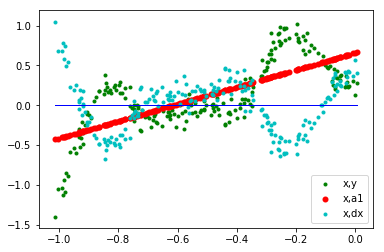

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = linear1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    loss_del = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = linear1.backward(loss_del)
    
    linear1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', linear1.weights)
        print("Biases 1", '\n', linear1.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

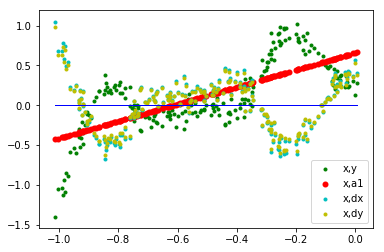

In [8]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, loss_del.reshape(-1), marker='.', c='y', lw=1, label='x,dy')
plt.legend()

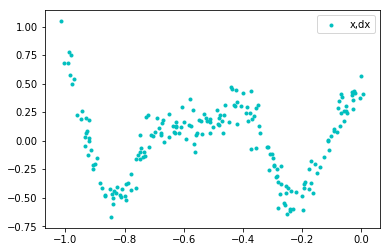

In [9]:
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.legend()

In [ ]:
'''
use at least the number of inputs or output as a linear only function in a network.
This keeps in the error of the non linear parts of the function like zeros of relu under control.

The error is detected via backpropagation through linear transformation.

'''

In [37]:
hidden_size = 3

layer1a = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [38]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    
    a1a = layer1a.forward(x_data)
    a2a = layer2a.forward(a1a)
    
#     a1l = linear1.forward(x_data - a2a)
    
    lossa = tnn.MseLoss.loss(a2a, dx)
    loss_dela = tnn.MseLoss.del_loss(a2a, dx)
    
    da1 = layer2a.backward(loss_dela)
    dxa = layer1a.backward(da1)
    
    layer1a.update()
    layer2a.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, dx.reshape(-1), marker='.', c='g', lw=1, label='x, dx')
        plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
        plt.scatter(x, dxa.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        plt.legend()
        
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1a.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
        fig.canvas.draw()
        
        plt.pause(0.01)
#         print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.046631215563041103
_______________________
epoch 10
Loss 0.046631215563041103
_______________________
epoch 20
Loss 0.046631215563041103
_______________________
epoch 30
Loss 0.046631215563041103
_______________________
epoch 40
Loss 0.046631215563041103
_______________________
epoch 50
Loss 0.046631215563041103
_______________________
epoch 60
Loss 0.046631215563041103
_______________________
epoch 70
Loss 0.046631215563041103
_______________________
epoch 80
Loss 0.046631215563041103
_______________________
epoch 90
Loss 0.046631215563041103
_______________________
epoch 100
Loss 0.046631215563041103
_______________________
epoch 110
Loss 0.046631215563041103
_______________________
epoch 120
Loss 0.046631215563041103
_______________________
epoch 130
Loss 0.046631215563041103
_______________________
epoch 140
Loss 0.046631215563041103
_______________________
epoch 150
Loss 0.046631215563041103
_______________________
epoch 160
Loss 0.0466312155

_______________________
epoch 1370
Loss 0.046631215563041103
_______________________
epoch 1380
Loss 0.046631215563041103
_______________________
epoch 1390
Loss 0.046631215563041103
_______________________
epoch 1400
Loss 0.046631215563041103
_______________________
epoch 1410
Loss 0.046631215563041103
_______________________
epoch 1420
Loss 0.046631215563041103
_______________________
epoch 1430
Loss 0.046631215563041103
_______________________
epoch 1440
Loss 0.046631215563041103
_______________________
epoch 1450
Loss 0.046631215563041103
_______________________
epoch 1460
Loss 0.046631215563041103
_______________________
epoch 1470
Loss 0.046631215563041103
_______________________
epoch 1480
Loss 0.046631215563041103
_______________________
epoch 1490
Loss 0.046631215563041103
_______________________
epoch 1500
Loss 0.046631215563041103
_______________________
epoch 1510
Loss 0.046631215563041103
_______________________
epoch 1520
Loss 0.046631215563041103
_______________________


_______________________
epoch 2730
Loss 0.046631215563041103
_______________________
epoch 2740
Loss 0.046631215563041103
_______________________
epoch 2750
Loss 0.046631215563041103
_______________________
epoch 2760
Loss 0.046631215563041103
_______________________
epoch 2770
Loss 0.046631215563041103
_______________________
epoch 2780
Loss 0.046631215563041103
_______________________
epoch 2790
Loss 0.046631215563041103
_______________________
epoch 2800
Loss 0.046631215563041103
_______________________
epoch 2810
Loss 0.046631215563041103
_______________________
epoch 2820
Loss 0.046631215563041103
_______________________
epoch 2830
Loss 0.046631215563041103
_______________________
epoch 2840
Loss 0.046631215563041103
_______________________
epoch 2850
Loss 0.046631215563041103
_______________________
epoch 2860
Loss 0.046631215563041103
_______________________
epoch 2870
Loss 0.046631215563041103
_______________________
epoch 2880
Loss 0.046631215563041103
_______________________


TclError: this isn't a Tk application

In [45]:
print("Weight 1", '\n', layer1a.weights)
print("Biases 1", '\n', layer1a.bias)
print("Weight 2", '\n', layer2a.weights)
print("Biases 2", '\n', layer2a.bias)

Weight 1 
 [[-2.84456062 -0.10116726 -2.83582348]]
Biases 1 
 [-0.44710076 -0.22212384 -0.00119161]
Weight 2 
 [[ 1.58928184]
 [-0.83930661]
 [-1.47904593]]
Biases 2 
 [0.48383041]


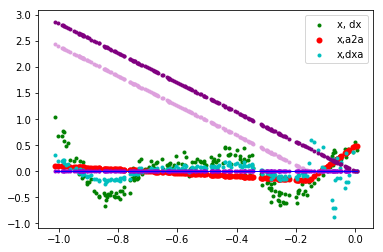

In [46]:
% matplotlib inline
plt.scatter(x, dx.reshape(-1), marker='.', c='g', lw=1, label='x, dx')
plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
plt.scatter(x, dxa.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')

colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(a1a.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

In [64]:
layer1a.del_zee
# da1.shape

array([[-9.14480105e-01,  0.00000000e+00,  8.51038933e-01],
       [-7.61114185e-01,  0.00000000e+00,  7.08312625e-01],
       [-9.21373561e-01,  0.00000000e+00,  8.57454163e-01],
       [-1.49772506e+00,  0.00000000e+00,  1.39382183e+00],
       [-1.65288865e-01,  0.00000000e+00,  1.53822110e-01],
       [-7.15368015e-01,  0.00000000e+00,  6.65740052e-01],
       [-1.08252678e+00,  0.00000000e+00,  1.00742753e+00],
       [-1.03420416e+00,  0.00000000e+00,  9.62457252e-01],
       [-1.51754316e-02,  0.00000000e+00,  1.41226507e-02],
       [ 6.90516018e-02, -0.00000000e+00, -6.42612138e-02],
       [-6.33089353e-01,  0.00000000e+00,  5.89169392e-01],
       [ 2.44756137e-02, -0.00000000e+00, -2.27776417e-02],
       [-2.12510384e-01,  0.00000000e+00,  1.97767682e-01],
       [ 1.96500820e-01, -0.00000000e+00, -1.82868766e-01],
       [-1.82911951e-01,  0.00000000e+00,  1.70222612e-01],
       [ 2.54125911e-01, -0.00000000e+00, -2.36496173e-01],
       [-2.76403899e-01,  0.00000000e+00

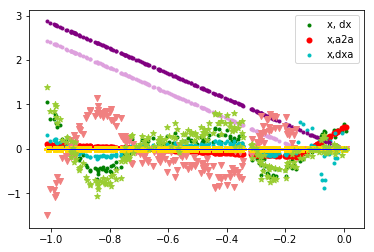

In [65]:
% matplotlib inline
plt.scatter(x, dx.reshape(-1), marker='.', c='g', lw=1, label='x, dx')
plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
plt.scatter(x, dxa.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')

colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(a1a.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)
    

# colors = ['yellow', 'gold', 'khaki', 'darkgoldenrod']
colors = ['lightcoral', 'gold', 'yellowgreen']
markers = ['v', 'P', '*']
for i, out in enumerate(layer1a.del_zee.T):
    plt.scatter(x, out, marker=markers[i], c=colors[i], lw=1)
    
    
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

In [ ]:
'''
Here we observe that the residual for the non-linear(relu) MLP is not properly scaled.
There seems to be some error due to combinational backward gradient.
- Here the output produced by the points near -0.5 all output 0s. 
  Therefore the residual comes as 0s due to backpropagation formula.
  
We can calculate appropriate residual to make furthur error reduction network.

Solution:
1. Use residual in the [del_loss] for adding a new MLP(x --> del_y) to accomodate the error: [ignores input residual directly]
    This equivalently adds new hidden units to the existing network
2. Use equivalent piecewise network to calculate the exact residual.(Zeros doesnt hamper the residual here)
    a. Formulate linearly independent neural network: error is caused by only one neuron. Hence, the residual is known well
    b. Add a linear unit to every layer for proper residual
'''

In [66]:
# when residual and original network is combined serially

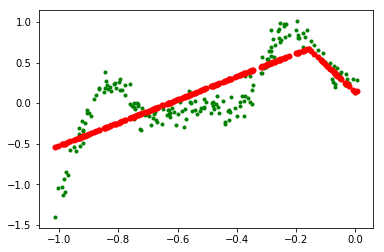

In [67]:
a1a = layer1a.forward(x_data)
a2a = layer2a.forward(a1a)
a1l = linear1.forward(x_data - a2a)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1l.reshape(-1), marker='.', c='r', lw=3, label='x,a1l')